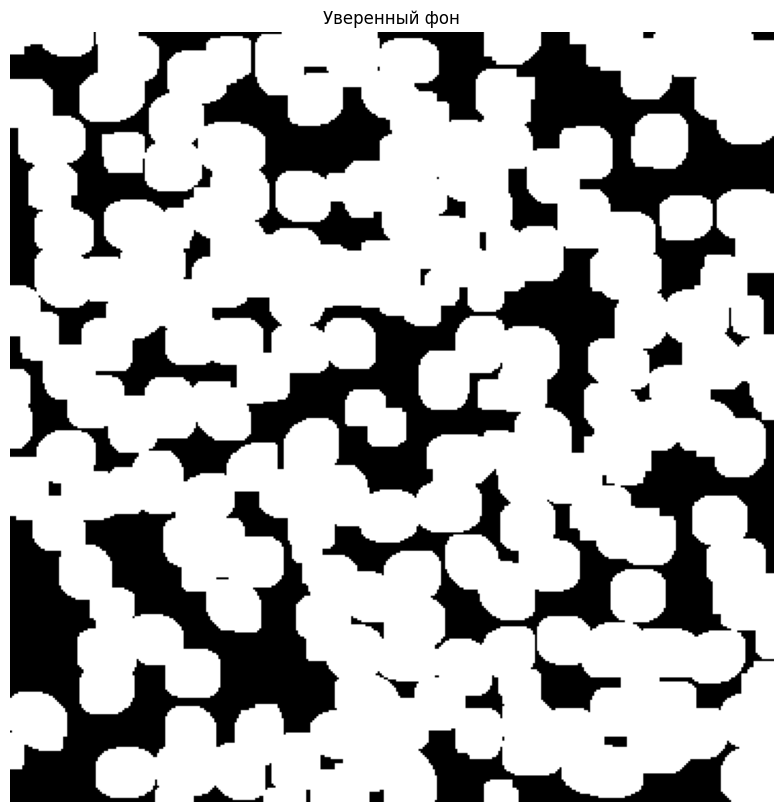

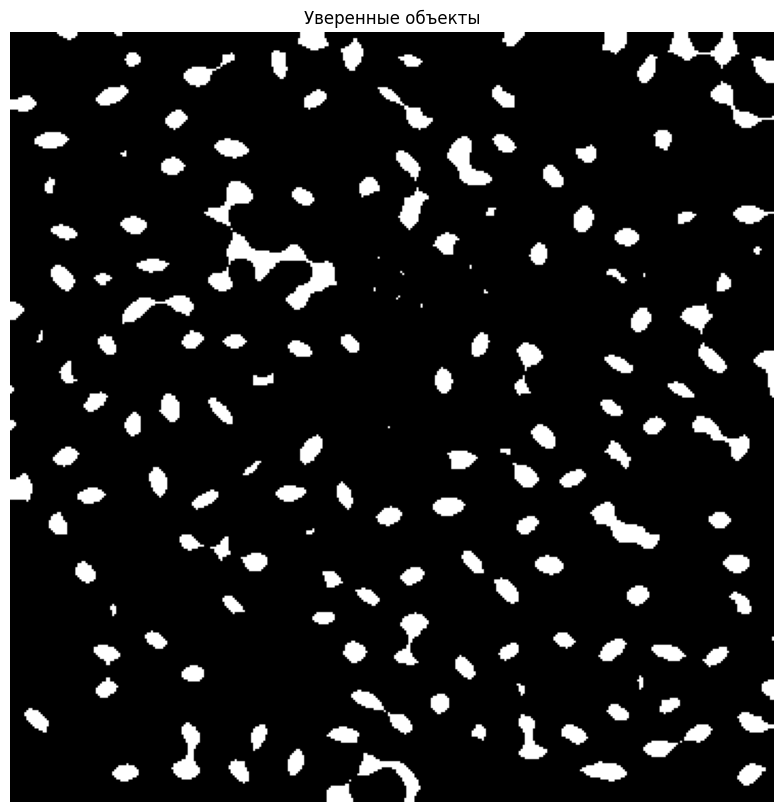

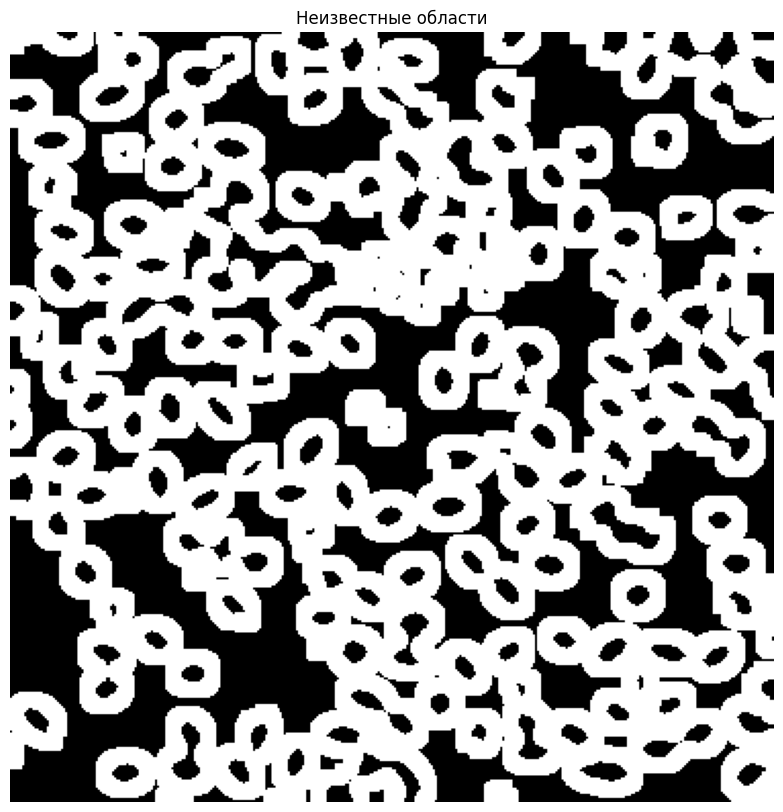

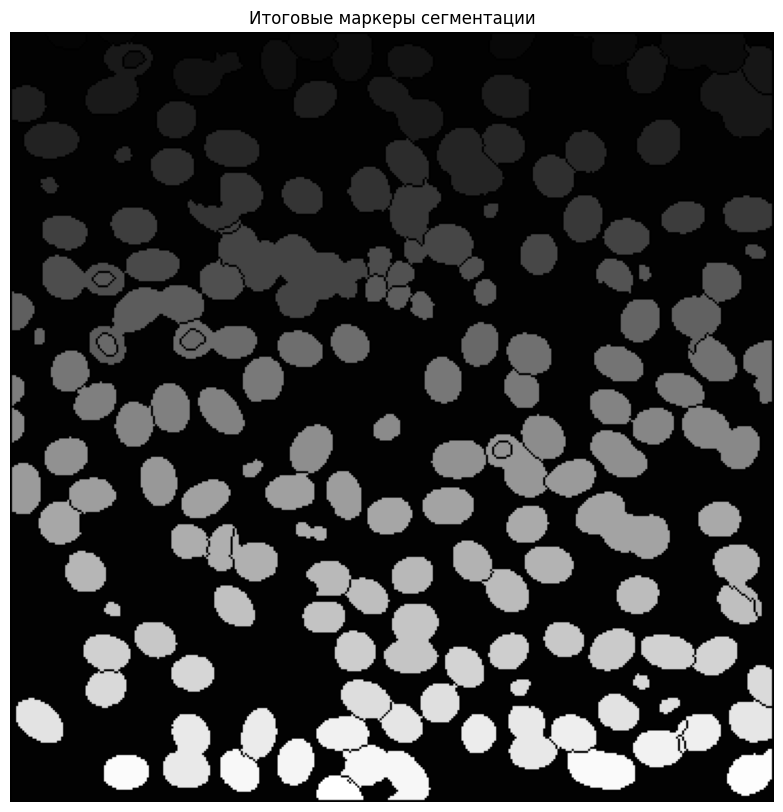

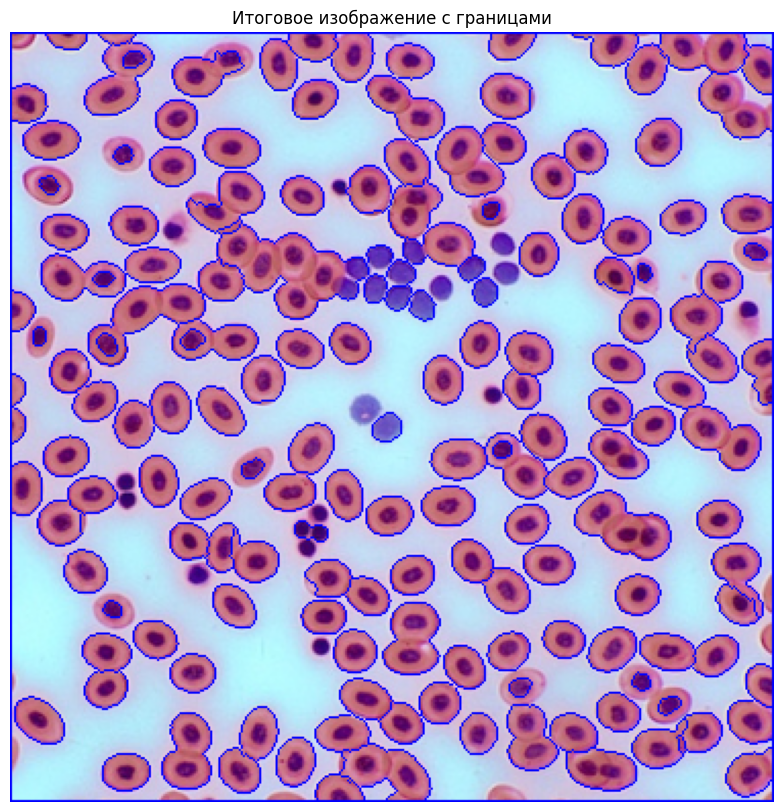

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Функция для отображения изображения
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Загружаем изображение
image_path = '/content/image b.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Изображение не найдено. Проверьте путь.")

# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Показываем исходное изображение
show_image("Исходное изображение", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Применяем бинаризацию (Otsu threshold)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image("Бинаризованное изображение", thresh)

# Удаляем шумы с помощью морфологической операции "открытие"
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("После морфологического открытия", opening)

# Определяем фон
sure_bg = cv2.dilate(opening, kernel, iterations=3)
show_image("Уверенный фон", sure_bg)

# Трансформация расстояния
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
show_image("Трансформация расстояния", dist_transform)

# Определение уверенных объектов
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
show_image("Уверенные объекты (после трансформации расстояния)", sure_fg)

# Обновление неизвестных областей
unknown = cv2.subtract(sure_bg, sure_fg)
show_image("Обновленные неизвестные области", unknown)

# Подсчет меток
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
show_image("Обновленные маркеры для водораздела", markers.astype(np.uint8) * 85)

# Применение метода водораздела
markers = cv2.watershed(image, markers)

# Добавляем границы объектов
image[markers == -1] = [255, 0, 0]  # Задаем границы красным цветом в формате BGR
show_image("Итоговое изображение с разделением объектов", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

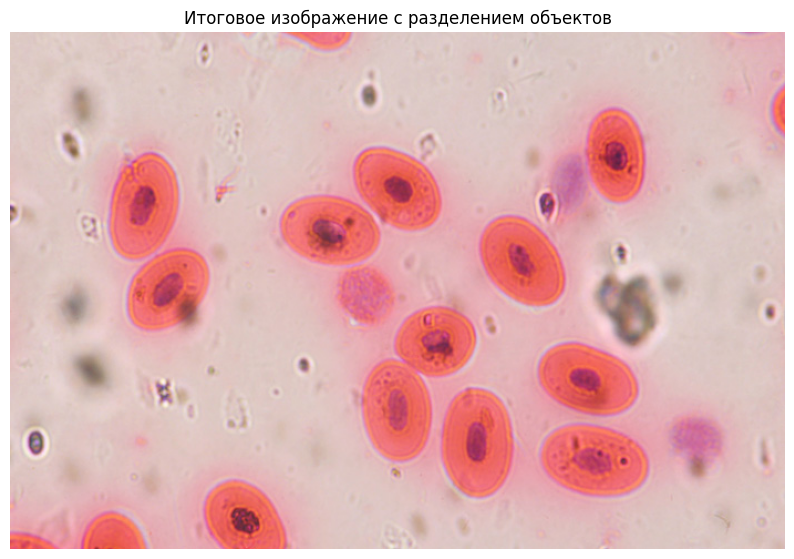

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Функция для отображения изображения
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Загружаем изображение
image_path = '/content/image b.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Изображение не найдено. Проверьте путь.")

# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Показываем исходное изображение
show_image("Исходное изображение", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Применяем бинаризацию (Otsu threshold)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image("Бинаризованное изображение", thresh)

# Удаляем шумы с помощью морфологической операции "открытие"
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("После морфологического открытия", opening)

# Определяем фон
sure_bg = cv2.dilate(opening, kernel, iterations=3)
show_image("Уверенный фон", sure_bg)

# Трансформация расстояния
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
show_image("Трансформация расстояния", dist_transform)

# Определение уверенных объектов
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
show_image("Уверенные объекты (после трансформации расстояния)", sure_fg)

# Обновление неизвестных областей
unknown = cv2.subtract(sure_bg, sure_fg)
show_image("Обновленные неизвестные области", unknown)

# Подсчет меток
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
show_image("Обновленные маркеры для водораздела", markers.astype(np.uint8) * 85)

# Реализация водораздела вручную
def watershed_manual(image, markers):
    height, width = markers.shape
    iterations = 100  # Максимальное количество итераций

    # Алгоритм водораздела
    for _ in range(iterations):
        prev_markers = markers.copy()

        # Итерируем по каждому пикселю
        for y in range(1, height - 1):
            for x in range(1, width - 1):
                if markers[y, x] == 0:  # Неизвестные пиксели
                    # Соседние пиксели
                    neighbors = [markers[y-1, x], markers[y+1, x], markers[y, x-1], markers[y, x+1]]
                    unique_neighbors = list(set(neighbors) - {0})

                    if len(unique_neighbors) == 1:
                        markers[y, x] = unique_neighbors[0]
                    elif len(unique_neighbors) > 1:
                        markers[y, x] = -1  # Граница между объектами

        # Если маркеры не изменились, алгоритм завершен
        if np.array_equal(markers, prev_markers):
            break

    return markers

# Применяем метод водораздела вручную
markers_manual = watershed_manual(image, markers.copy())

# Добавляем границы объектов
image[markers_manual == -1] = [255, 0, 0]  # Задаем границы красным цветом в формате BGR
show_image("Итоговое изображение с разделением объектов вручную", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Функция для отображения изображения
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Загружаем изображение
image_path = '/content/image b.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Изображение не найдено. Проверьте путь.")

# Преобразуем изображение в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Показываем исходное изображение
show_image("Исходное изображение", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Применяем бинаризацию (Otsu threshold)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image("Бинаризованное изображение", thresh)

# Удаляем шумы с помощью морфологической операции "открытие"
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("После морфологического открытия", opening)

# Определяем фон
sure_bg = cv2.dilate(opening, kernel, iterations=3)
show_image("Уверенный фон", sure_bg)

# Трансформация расстояния
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
show_image("Трансформация расстояния", dist_transform)

# Определение уверенных объектов
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
show_image("Уверенные объекты (после трансформации расстояния)", sure_fg)

# Обновление неизвестных областей
unknown = cv2.subtract(sure_bg, sure_fg)
show_image("Обновленные неизвестные области", unknown)

# Подсчет меток
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Чтобы метки объектов начинались с 1, а не с 0
markers[unknown == 255] = 0  # Для неизвестных областей используем метку 0 (фон)

# Показываем маркеры
show_image("Обновленные маркеры для водораздела", markers.astype(np.uint8) * 85)

# Собственная реализация метода водораздела
# 1. Преобразуем markers в трехмерный массив (имитация каналов RGB)
height, width = markers.shape
water_image = np.zeros((height, width, 3), dtype=np.uint8)

# Задаем цвет для каждой метки
np.random.seed(42)  # Для воспроизводимости
label_colors = np.random.randint(0, 255, size=(np.max(markers) + 1, 3), dtype=np.uint8)

# Начальная раскраска
for y in range(height):
    for x in range(width):
        label = markers[y, x]
        if label > 0:  # Если это не неизвестная область (0)
            water_image[y, x] = label_colors[label]

show_image("Начальная раскраска меток", cv2.cvtColor(water_image, cv2.COLOR_BGR2RGB))

# 2. Имитация затопления (по высоте градиента)
gradient = cv2.Laplacian(gray, cv2.CV_64F)
gradient = np.abs(gradient).astype(np.uint8)
show_image("Градиент изображения", gradient)

# Подготовка для затопления
water_image = np.zeros_like(image)

for y in range(height):
    for x in range(width):
        if markers[y, x] > 0:  # Затопляем только известные области
            water_image[y, x] = label_colors[markers[y, x]]

# 3. Добавление вывода, аналогичного результату с использованием cv2.watershed
# 3.1 Границы объектов
final_image = image.copy()

# Границы объектов - метки == 0
final_image[markers == 0] = [255, 0, 0]  # Границы объектов красным

# Показываем итоговое изображение с границами
show_image("Итоговое изображение с разделением объектов (аналог Watershed)", cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))


Output hidden; open in https://colab.research.google.com to view.